# This notebook solves the Huggett Model (1993) using Dolo.

In [3]:
# First import the packages
Pkg.dir("Dolo")
import Dolo
using AxisArrays
using PyPlot

. To use SymEngine call Pkg.add("SymEngine")


In [94]:
# get the model file
filename=("huggett_1993.yaml")

"huggett_1993.yaml"

In [95]:
# Convert the file into Dolo model
model=Dolo.yaml_import(filename)

Model 


MethodError: MethodError: no method matching sanitize(::Expr, ::Dolo.Model{Symbol("##391")})[0m
Closest candidates are:
  sanitize(::Expr, [1m[31m::Array{Symbol,1}[0m) at C:\Users\Angela\AppData\Local\JuliaPro-0.5.1.1\pkgs-0.5.1.1\v0.5\Dolo\src\printing.jl:14
  sanitize(::Any, [1m[31m::Array{Symbol,1}[0m) at C:\Users\Angela\AppData\Local\JuliaPro-0.5.1.1\pkgs-0.5.1.1\v0.5\Dolo\src\printing.jl:3
  sanitize(::Any, [1m[31m::Dolo.SModel{ID}[0m) at C:\Users\Angela\AppData\Local\JuliaPro-0.5.1.1\pkgs-0.5.1.1\v0.5\Dolo\src\printing.jl:32[0m

The characteristics of the AR1 process for income are:

In [4]:
#The process has a mean : 
print(model.exogenous.mu)
# and a steandard deviation: 
print(sqrt(model.exogenous.Sigma))
# and persistence parameter:
print(sqrt(model.exogenous.R))

[0.0][0.016][0.921954]

Simulate the AR1 process.

In [5]:
# Choose number of simulations, N, and number of simulated periods, T.
N=50
T = 1000

# simulate the process 
simAR = Dolo.simulate(model.exogenous,N,T);

Let's plot the simulated AR1 process.

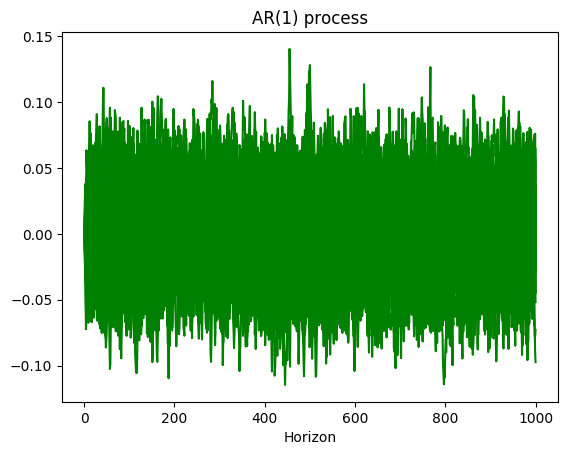

In [6]:
import PyPlot
plt=PyPlot
hor= linspace(1, T, T)
for i in 1:size(simAR,2)
    plt.plot(hor, vec(simAR[:,i,:]), color="green")
end

plt.xlabel("Horizon");
plt.title("AR(1) process");

Now let's look at solving the model. We will use Dolo's time iteration function (which iterates on the residuals of the arbitrage equation).

In [96]:
@time sol=Dolo.time_iteration(model,verbose=false, maxit=1000, details=true)
dr=sol.dr
@time res = Dolo.time_iteration(model, dr; maxit=100, details=true)

  1.682428 seconds (2.50 M allocations: 158.793 MB, 2.53% gc time)
It    SA          gain        nit  
-----------------------------------
0     6.32e-07    NaN         0    
1     0.00e+00    0.00e+00    0    
  0.953876 seconds (664.97 k allocations: 25.468 MB, 1.52% gc time)


Results of Time Iteration Algorithm
 * Complementarities: true
 * Decision Rule type: Dolo.TimeIterationResult
 * Number of iterations: 1
 * Convergence: true
   * |x - x'| < 1.0e-08: true


Dolo tabulate gives us the decision rules.

In [97]:
drtab = Dolo.tabulate(model, dr, :s) 

2-dimensional AxisArray{Float64,2,...} with axes:
    :V, Symbol[:y,:s,:a]
    :s, [-0.5,-0.292929,-0.0858586,0.121212,0.328283,0.535354,0.742424,0.949495,1.15657,1.36364  …  18.1364,18.3434,18.5505,18.7576,18.9646,19.1717,19.3788,19.5859,19.7929,20.0]
And data, a 3×100 Array{Float64,2}:
  0.0         0.0         0.0         …   0.0       0.0       0.0   
 -0.5        -0.292929   -0.0858586      19.5859   19.7929   20.0   
  0.0554697   0.0326247   0.00973657     -2.23494  -2.25857  -2.2822

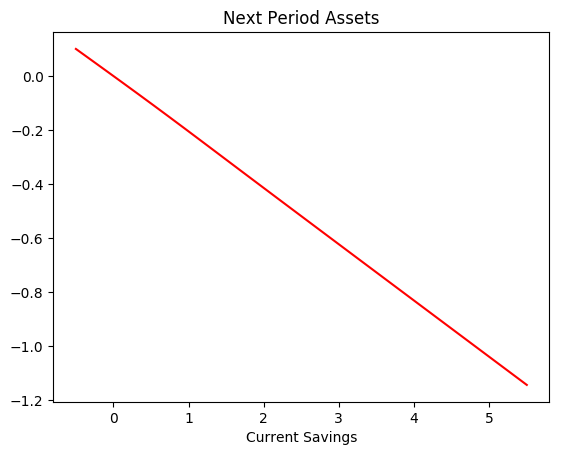

In [91]:
import PyPlot;
plt=PyPlot
fig = plt.figure("Savings")

plt.plot(drtab[:s][1:30], drtab[Axis{:V}(:a)][1:30], color="red", label="Next period assets")
plt.xlabel("Current Savings");
plt.title("Next Period Assets");


Now we simulate the model. We do 100 simulations, each for $T=100$ periods.

In [98]:
# Simulations
mc_ar=model.exogenous
sim_armc = Dolo.simulate(model,dr;N=100,T=100)

3-dimensional AxisArray{Float64,3,...} with axes:
    :N, 1:100
    :V, Symbol[:y,:s,:a]
    :T, 1:100
And data, a 100×3×100 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.000223505
 0.0  0.0  0.000223505
 0.0  0.0  0.000223505
 0.0  0.0  0.000223505
 0.0  0.0  0.000223505
 0.0  0.0  0.000223505
 0.0  0.0  0.000223505
 0.0  0.0  0.000223505
 0.0  0.0  0.000223505
 0.0  0.0  0.000223505
 0.0  0.0  0.000223505
 0.0  0.0  0.000223505
 0.0  0.0  0.000223505
 ⋮                    
 0.0  0.0  0.000223505
 0.0  0.0  0.000223505
 0.0  0.0  0.000223505
 0.0  0.0  0.000223505
 0.0  0.0  0.000223505
 0.0  0.0  0.000223505
 0.0  0.0  0.000223505
 0.0  0.0  0.000223505
 0.0  0.0  0.000223505
 0.0  0.0  0.000223505
 0.0  0.0  0.000223505
 0.0  0.0  0.000223505

[:, :, 2] =
 -0.00968293   0.000223505  -0.000177321
  0.00582627   0.000223505   0.00042499 
  0.008399     0.000223505   0.000524901
  0.0217457    0.000223505   0.00104307 
 -0.00437317   0.000223505   2.88797e-5 
  0.00748103   0.000223505   

In [99]:
T=100
hor=linspace(1,T,T)
N=1
ii=50

50

Here are plots for the simulations.

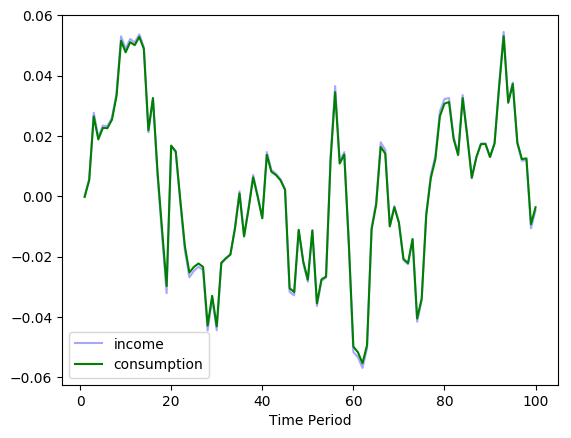

PyObject <matplotlib.text.Text object at 0x0000000018B2A630>

In [101]:
c=sim_armc[Axis{:N}(ii), Axis{:V}(:y)]+sim_armc[Axis{:N}(ii), Axis{:V}(:s)]*0.02-sim_armc[Axis{:N}(ii), Axis{:V}(:a)]
plt.plot(hor, sim_armc[Axis{:N}(ii), Axis{:V}(:y)],color="blue", alpha=0.35, label="income")
plt.plot(hor, c, color="green",label="consumption")
plt.legend()
plt.xlabel("Time Period")